# Libraries

In [42]:
import pandas as pd
import scipy.io
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns

# Exploring Rating

## Loading in Rating Data

In [3]:
path = "../data/behavioralRatings.mat"
with h5py.File(path, "r") as f:
    print("HDF5 keys:", list(f.keys()))



HDF5 keys: ['behavioralRatings']


In [4]:
with h5py.File(path, "r") as f:
    br = f["behavioralRatings"]
    print("Type:", type(br))
    print("Shape:", br.shape)
    print("Dtype:", br.dtype)


Type: <class 'h5py._hl.dataset.Dataset'>
Shape: (2, 10, 20)
Dtype: float64


Ok so I know that the dataset is 2 layers first one for familiarity rating and second one for enjoyment rating. There are 10 songs listend to, and 20 participants. I tested viewing this file in MatLab Online to confirm file structure. 

In [5]:
with h5py.File(path, "r") as f:
    br = f["behavioralRatings"][:]   # turn into NumPy array, shape (2, 10, 20)


In [6]:
br.shape  # (2, 10, 20)  = (ratingType, song_id, participant_id)


(2, 10, 20)

In [7]:
# (2, 10, 20) to (20, 10, 2) in order to turn into same structure as matlab 
ratings = np.transpose(br, (2, 1, 0))

print(ratings.shape)


(20, 10, 2)


In [ ]:
familiarity = ratings[:, :, 0]
enjoyment = ratings[:, :, 1] 


In [15]:
participants = np.arange(1, 21)
songs = np.arange(1, 11)

# creating the dataframe so I can do analysis
fam_df = pd.DataFrame(familiarity,
                      index=participants,
                      columns=[f"song_{s}" for s in songs]).rename_axis("subject").reset_index()

like_df = pd.DataFrame(enjoyment,
                      index=participants,
                      columns=[f"song_{s}" for s in songs]).rename_axis("subject").reset_index()


In [11]:
fam_df

,subject,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10
0,1,1.0,1.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0
1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,10,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0


In [16]:
like_df

,subject,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10
0,1,8.0,8.0,5.0,5.0,9.0,7.0,6.0,7.0,5.0,5.0
1,2,8.0,8.0,7.0,5.0,3.0,7.0,5.0,5.0,4.0,4.0
2,3,8.0,7.0,8.0,6.0,8.0,7.0,7.0,8.0,7.0,6.0
3,4,8.0,7.0,2.0,7.0,9.0,6.0,7.0,7.0,5.0,7.0
4,5,6.0,8.0,6.0,5.0,7.0,7.0,8.0,7.0,7.0,3.0
5,6,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0
6,7,6.0,2.0,2.0,5.0,3.0,7.0,3.0,5.0,3.0,2.0
7,8,5.0,8.0,3.0,7.0,5.0,6.0,6.0,6.0,7.0,4.0
8,9,7.0,5.0,6.0,5.0,6.0,5.0,4.0,6.0,3.0,2.0
9,10,5.0,4.0,2.0,7.0,5.0,6.0,4.0,7.0,3.0,1.0


## Specifically Looking at Enjoyment Score

In [18]:
song_means = like_df.drop(columns="subject").mean(axis=0)
print(song_means)


song_1     6.60
song_2     6.05
song_3     4.55
song_4     6.05
song_5     6.20
song_6     6.75
song_7     5.45
song_8     6.60
song_9     5.20
song_10    3.05
dtype: float64


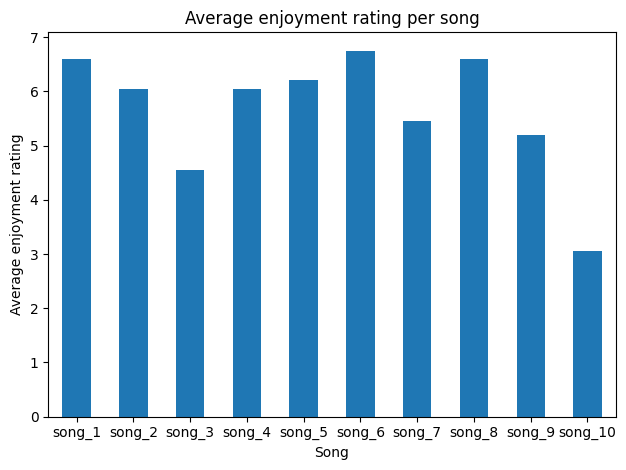

In [22]:
plt.figure()
song_means.plot(kind="bar")
plt.ylabel("Average enjoyment rating")
plt.xlabel("Song")
plt.title("Average enjoyment rating per song")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


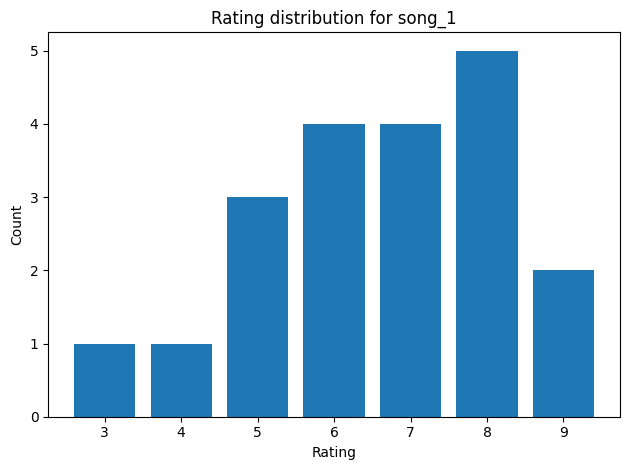

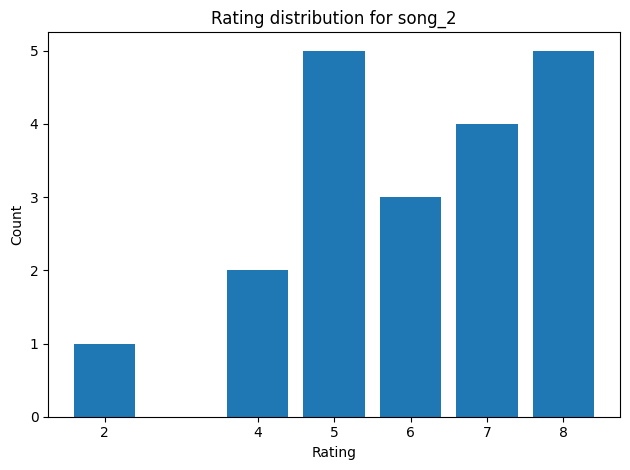

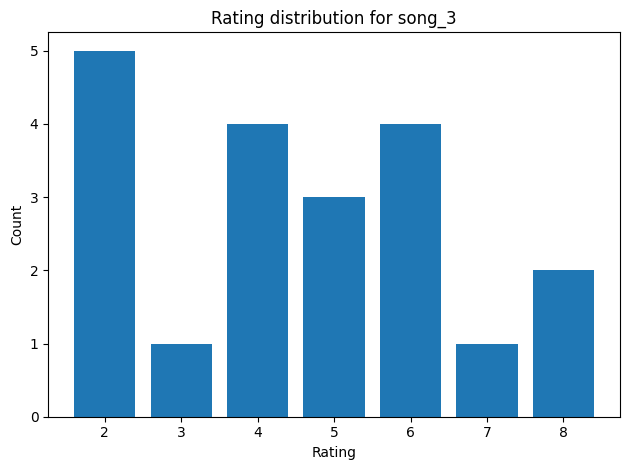

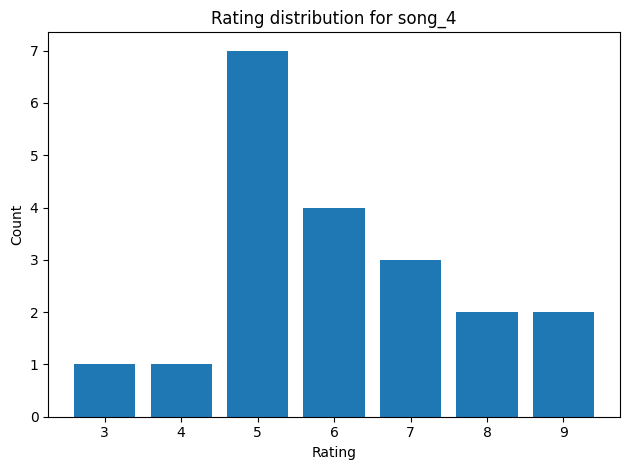

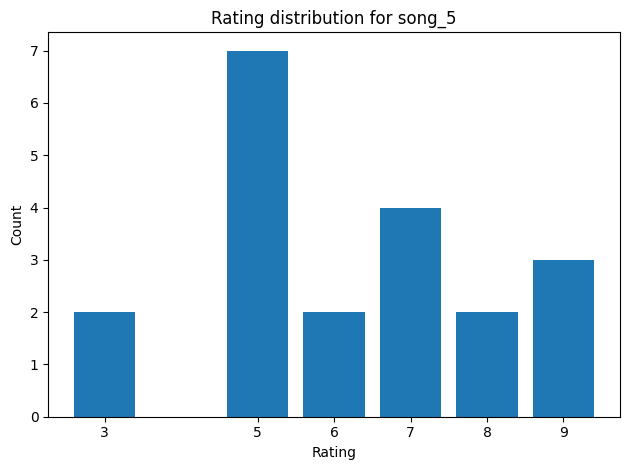

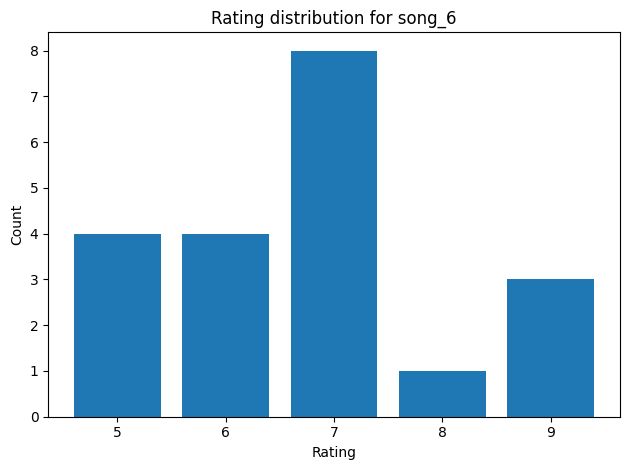

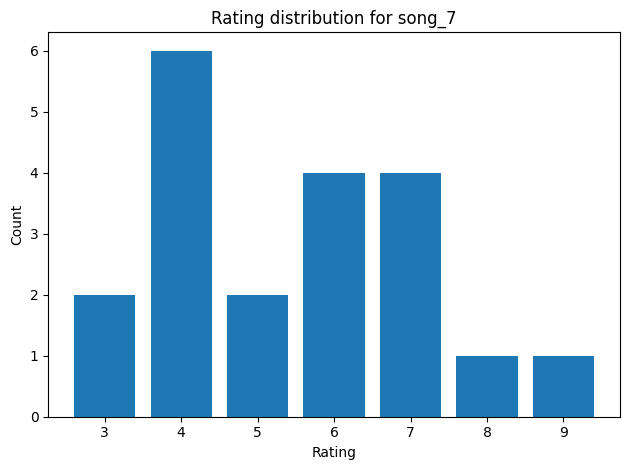

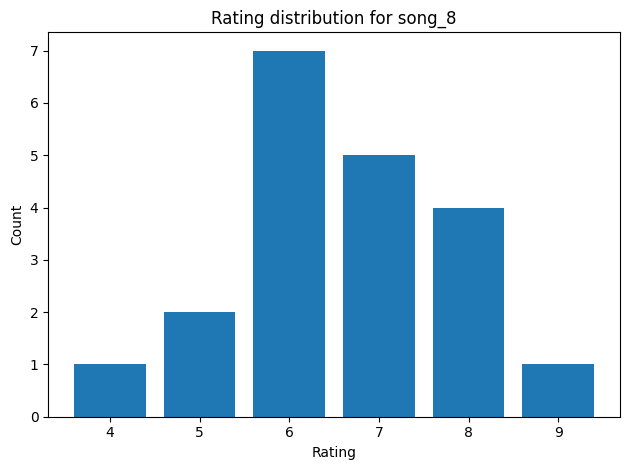

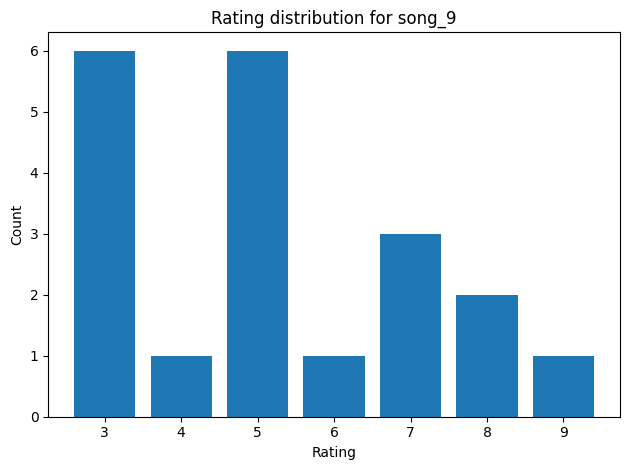

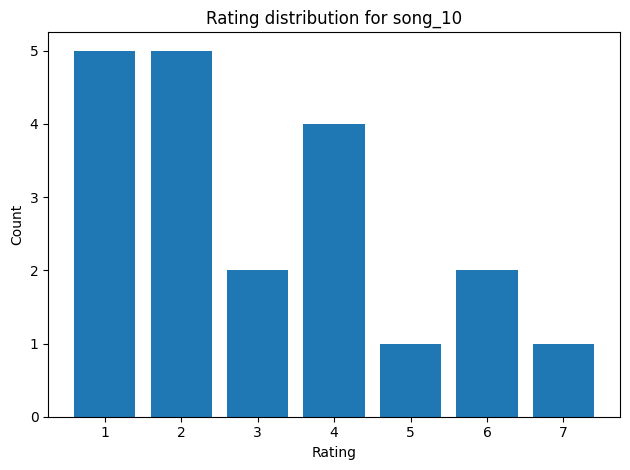

In [24]:
song = [f"song_{s}" for s in songs]

for i in range(len(songs)):
    counts = like_df[song[i]].value_counts().sort_index()
    plt.figure()
    plt.bar(counts.index, counts.values)
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.title(f"Rating distribution for {song[i]}")
    plt.xticks(counts.index)
    plt.tight_layout()
    plt.show()

# Demographic Data

In [34]:
demographic_path = "../data/participantInfo.mat"

mat = loadmat(
    path,
    squeeze_me=True,        # remove extra singleton dimensions
    struct_as_record=False  # make MATLAB structs act like simple Python objects
)

demographic_info = mat["participantInfo"]
demographic_info.shape


(20,)

In [ ]:
rows = []

for i, subj in enumerate(demographic_info, start=1):
    pid = subj.id
    rows.append({
        "person": i,
        "id": pid,
        "age": float(subj.age),
        "nYearsTraining": float(subj.nYearsTraining),
        "weeklyListening": float(subj.weeklyListening),
    })

demographic_df = pd.DataFrame(rows)
demographic_df


,person,id,age,nYearsTraining,weeklyListening
0,1,S02,25.0,2.0,28.0
1,2,S03,18.0,11.0,7.0
2,3,S04,29.0,24.0,7.0
3,4,S05,24.0,8.0,21.0
4,5,S06,22.0,0.0,5.0
5,6,S07,24.0,4.0,17.5
6,7,S08,19.0,0.0,31.5
7,8,S09,23.0,0.0,23.8
8,9,S10,20.0,1.5,14.0
9,10,S11,23.0,12.0,28.0


with only 20 participants, its hard to get good looking distribution plots

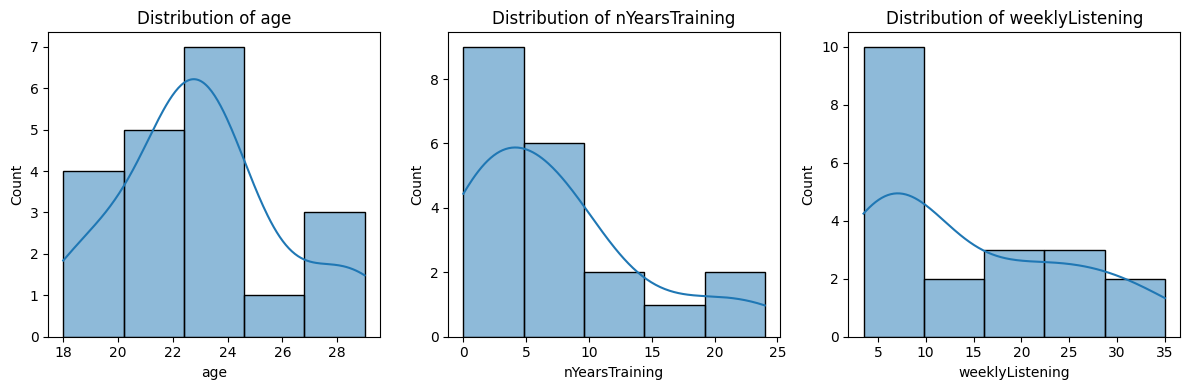

In [48]:
cols = ["age", "nYearsTraining", "weeklyListening"]
plt.figure(figsize=(12, 4))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(demographic_df[col], kde=True, bins=5)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()